<a href="https://colab.research.google.com/github/AnanyaSharma2/data-analysis/blob/main/catAnddog_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#tf.logging.set_verbosity(tf.logging.ERROR)

Downloading the dogs and cat dataset directly from the url




This keras function get_file will download the data set from the url and unpack it on the disk

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [3]:
zip_dir_base = os.path.dirname(zip_dir)
zip_dir_base

'/root/.keras/datasets'

The command  is used to find and print all the directories within the specified directory ($zip_dir_base). Let's break down the command:




1.   ! is used in Colab notebooks to run shell commands.
2.   find is a command-line utility that searches for files and directories within a specified directory hierarchy.


3.   $zip_dir_base is a variable that represents the base directory where the dataset is stored.
4.   The option -type d is used to specify that we are searching for directories. The option -print is used to print the directories that are found.



When you run this command, it will search for all directories within the specified directory ($zip_dir_base) and print their paths.



In [4]:
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [5]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [8]:
# setting the batch size and
#image dimension as in data set we have images of diffent sizes
# but in neural network we need fixed size images so to overcome this problem
# we set a image size than we reshape the images according to that set parameter

BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150

## **Data Preparation**
Images must be formatted into appropriately pre-processed floating point tensors before being fed into the network. The steps involved in preparing these images are:

1. Read images from the disk


2. Decode contents of these images and convert it into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
Fortunately, all these tasks can be done using the class tf.keras.preprocessing.image.ImageDataGenerator.

 **train_image_generator** and **validation_image_generator** are **instances of the ImageDataGenerator class** from the Keras library. These generators are used to preprocess and augment the image data for training and validation.



---


train_image_generator = ImageDataGenerator(rescale=1./255)
Here, train_image_generator is created as an instance of ImageDataGenerator. The rescale parameter is set to 1./255, which means that the pixel values of the images will be rescaled to be in the range of 0 to 1. This rescaling is performed by dividing each pixel value by 255, which is the maximum pixel value for an 8-bit image.


---


validation_image_generator = ImageDataGenerator(rescale=1./255)
Similarly, validation_image_generator is created as an instance of ImageDataGenerator with the same rescale parameter. This ensures that the pixel values of the validation images are also rescaled to be in the range of 0 to 1.

By rescaling the pixel values, we normalize the image data, which can help improve the performance of the model during training.

These generators can be used to load and preprocess the image data in batches during the training and validation process. They provide various methods and options for data augmentation, such as rotation, zooming, and flipping, which can help increase the diversity of the training data and improve the model's ability to generalize to new images.


In [9]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

The flow_from_directory method is a convenient function provided by the Keras ImageDataGenerator class. It **allows you to generate batches of image data directly from a directory structure, without the need to load all the images into memory at once**. This is particularly **useful when working with large datasets.**

working of flow_from_directory method :

First, you create an instance of the ImageDataGenerator class and specify any desired preprocessing or data augmentation options.

Next, you use the flow_from_directory method on the ImageDataGenerator object to generate batches of image data. The method takes the following parameters:

1. directory: The path to the target directory containing the image files. The
directory structure should be organized such that each subdirectory represents a different class or category of images.

2. target_size: The dimensions to which the images will be resized. It is specified as a tuple (height, width).

3. batch_size: The number of images in each batch.

4. class_mode: The type of label generation. It can be set to 'binary' for binary classification or 'categorical' for multi-class classification.

5. shuffle: Whether to shuffle the order of the images within each batch. This is typically *set to True during training *and* False during validation or testing.*

>



Once the flow_from_directory method is called, it returns a DirectoryIterator object that can be used to iterate over the generated batches of image data. This iterator provides the images and their corresponding labels.

By using the flow_from_directory method, you can easily load and preprocess image data in batches, which is essential for training deep learning models on large datasets. It also simplifies the process of handling image data and ensures that the data is loaded efficiently during training.


In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

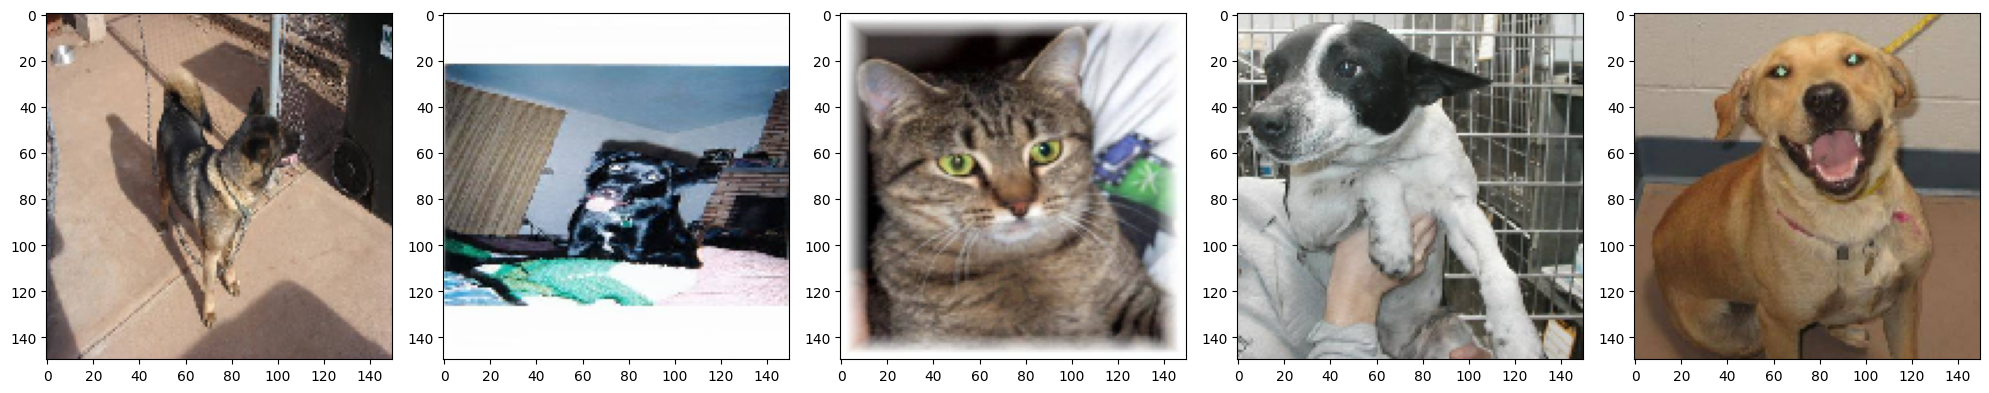

In [13]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [16]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-16-d70e0a339f06>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 28s 404ms/step - loss: 0.7099 - accuracy: 0.4925 - val_loss: 0.6915 - val_accuracy: 0.5430
Epoch 2/100
20/20 [==============================] - 5s 244ms/step - loss: 0.6897 - accuracy: 0.5280 - val_loss: 0.7084 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 6s 289ms/step - loss: 0.6930 - accuracy: 0.5350 - val_loss: 0.6856 - val_accuracy: 0.5660
Epoch 4/100
20/20 [==============================] - 5s 256ms/step - loss: 0.6752 - accuracy: 0.5800 - val_loss: 0.7115 - val_accuracy: 0.5310
Epoch 5/100
20/20 [==============================] - 6s 301ms/step - loss: 0.6567 - accuracy: 0.6065 - val_loss: 0.6265 - val_accuracy: 0.6260
Epoch 6/100
20/20 [==============================] - 5s 255ms/step - loss: 0.6088 - accuracy: 0.6620 - val_loss: 0.6184 - val_accuracy: 0.6480
Epoch 7/100
20/20 [==============================] - 6s 296ms/step - loss: 0.5703 - accuracy: 0.7085 - val_loss: 0.5977 - val_accuracy: 0.681

Validation accuracy and training accuracy are two metrics used to evaluate the performance of a machine learning model during the training process.

Training accuracy is a measure of how well the model performs on the training dataset. It is calculated by comparing the predicted labels of the training examples to their actual labels and determining the percentage of correctly classified examples. Training accuracy indicates how well the model has learned the patterns and features present in the training data.

Validation accuracy is a measure of how well the model performs on a separate validation dataset. The validation dataset is not used during the training process but is used to evaluate the model's performance on unseen data. Similar to training accuracy, validation accuracy is calculated by comparing the predicted labels to the actual labels and determining the percentage of correctly classified examples. Validation accuracy provides an estimate of how well the model is likely to perform on new, unseen data.

During the training process, the model's parameters (weights and biases) are updated based on the training data, and the training accuracy is calculated after each training iteration or epoch. The validation accuracy is calculated periodically using the validation dataset to monitor the model's performance on unseen data and to detect overfitting.

Ideally, both training accuracy and validation accuracy should be high, indicating that the model has learned the underlying patterns in the data and can generalize well to new examples. However, if the training accuracy is significantly higher than the validation accuracy, it may indicate overfitting, where the model has memorized the training data but fails to generalize to new data.

It is important to monitor both training accuracy and validation accuracy during the training process to ensure that the model is learning effectively and not overfitting. Adjustments to the model architecture, regularization techniques, or hyperparameters can be made based on these metrics to improve the model's performance.


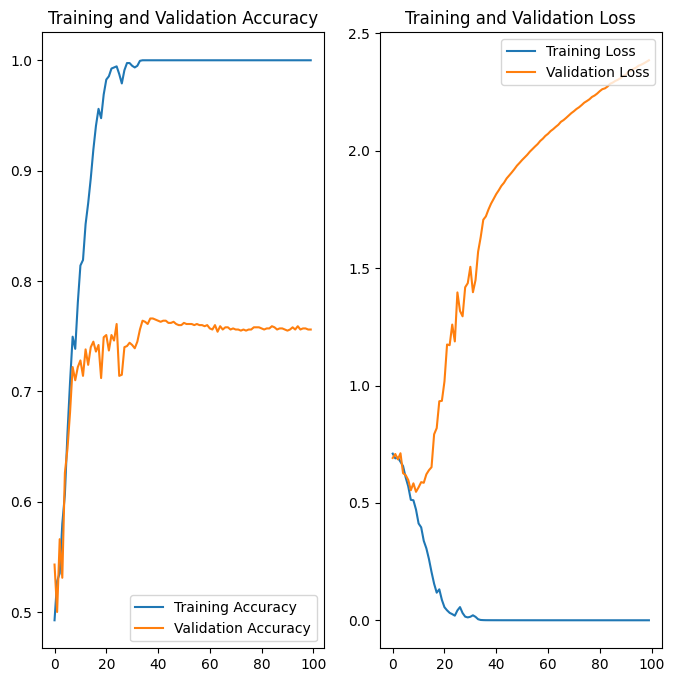

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()
